# Hi! In this code I'm implementing **Logistic Regression** from scratch!

## **1-** Importing necessary libraries:

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk                # An optional library for modernizing matplotlib
                                   # install : pip install mplcyberpunk

## **2-** Defining an initializer for importing and separating the data:

In [50]:
def initializer():
    df = pd.read_csv('Logistic_Regression_dataframe.csv')
    x = df.x.values.reshape(-1,1).T
    y = df.y.values.reshape(-1,1).T
    w = np.random.random((1,x.shape[0]))
    b = 0
    x = np.divide(x, 100)                  # Normalizing
    return x, y, w, b

## **3-** Initializing and visualizing the dataframe:

x shape: (1, 27) , w shape: (1, 1) , y shape: (1, 27)


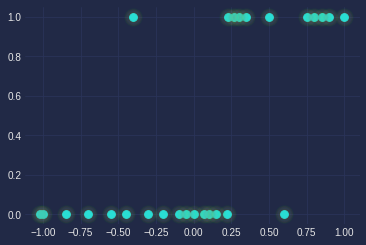

In [51]:
x, y, w, b = initializer()
print('x shape:',x.shape,', w shape:',w.shape,', y shape:',y.shape)
plt.style.use('cyberpunk')
plt.scatter(x, y, s=60)
mplcyberpunk.make_scatter_glow()
plt.show()

## **4-** Defining a sigmoid function using **Numpy**:

In [52]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

## **5-** Defining loss function (Binary Cross Entropy loss):

In [53]:
def cost(y_h, y):
    m = y_h.shape[0]
    cost = 0
    cost = ((-y * np.log(y_h)) - (1 - y) * np.log(1 - y_h)) / m
    return cost.sum()

**6-** Defining an optimizer (Gradient Decent):

In [54]:
def GD(w, b, y, iteration, alpha, limit):
    list_iter = []
    list_cost = []
    for i in range(iteration):
        w = w - alpha * np.sum((sigmoid(np.dot(w,x) + b) - y) * x)
        b = b - alpha * np.sum(sigmoid(np.dot(w,x) + b) - y)
        if i % limit == 0:
            list_iter.append(i)
            list_cost.append(cost(sigmoid(w.dot(x) + b), y))
    return w, b, list_cost, list_iter

## **7-** Training the model and visualizing the decay of the loss:

w and b before Gradient Decsent:  0.29031422159291764 0
w and b after Gradient Decsent:  4.268307764790088 -1.0459668394480952


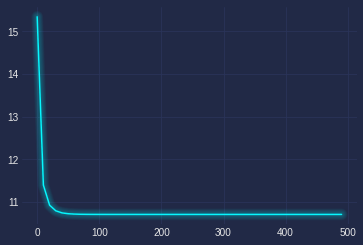

In [55]:
print("w and b before Gradient Decsent: ", w.item(), b)
w, b, list_cost, list_iter = GD(w, b, y, 500, 0.1, 10)
print("w and b after Gradient Decsent: ", w.item(), b)
plt.plot(list_iter,list_cost)
mplcyberpunk.make_lines_glow()
plt.show()

## **8-** Testing and visualizing the test data:

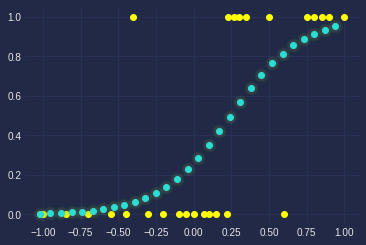

In [104]:
x_curve = np.arange(x.min(),x.max(),0.07).reshape(1,-1)
y_test = sigmoid(w.dot(x_curve) + b)
plt.scatter(x,y,color='yellow')
plt.scatter(x_curve,y_test)
mplcyberpunk.make_scatter_glow()
plt.show()

## **9-** Final accuracy for the data:

In [101]:
def accuracy(y_test, y):
    m = y.shape[1]
    true_guess = 0
    for i in range(m):
        if (y_test[0,i] >= 0.5 and y[0,i] == 1) or (y_test[0,i] < 0.5 and y[0,i] == 0):
            true_guess += 1
    return 100 * true_guess / m
print('accuracy : %',accuracy(y_test, y))

accuracy : % 81.48148148148148
